In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [2]:
Catalog78 = np.loadtxt("./volume_and_excentricity/78.vae", delimiter=",")
R = Catalog78[:,5]

In [3]:
R.max()

151.42373683919345

In [4]:
PositionBigVoid = np.where(R == R.max())[0][0]

In [5]:
Catalog78[PositionBigVoid]

array([ 1.00000000e+00,  2.72114301e+02, -2.22260575e+02,  3.75085873e+01,
        6.00000000e+03,  1.51423737e+02,  2.25249365e+02,  1.44630236e+02,
        1.06575948e+02,  1.97103286e-01, -1.05071270e-01, -9.74736027e-01,
        5.31328753e-01, -8.24114934e-01,  1.96276161e-01, -8.23917502e-01,
       -5.56591954e-01, -1.06608375e-01])

In [6]:
ML_ID_BigVoid = int(Catalog78[PositionBigVoid,0])

In [7]:
MasterList78 = np.loadtxt("masterlists/78.mls")

index = np.where(MasterList78[:,0] == ML_ID_BigVoid)

BigVoidML78 = MasterList78[index]
x = BigVoidML78[:,1]
y = BigVoidML78[:,2]
z = BigVoidML78[:,3]

In [8]:
BigVoidCat78 = Catalog78[ np.where(Catalog78[:,5] == Catalog78[:,5].max()) ]

In [9]:
!head -n 2 volume_and_excentricity/60.vae

# Void_ID, X_c, Y_c, Z_c, N_particles, R=(abc)^(-1/3), a, b, c, vector_a, vector_b, vector_c 



In [10]:
VoidID, x0, y0, z0, Npart, R, a, b, c, a1, a2, a3, b1, b2, b3, c1, c2, c3 = np.ndarray.tolist(BigVoidCat78[0])

<IPython.core.display.Javascript object>


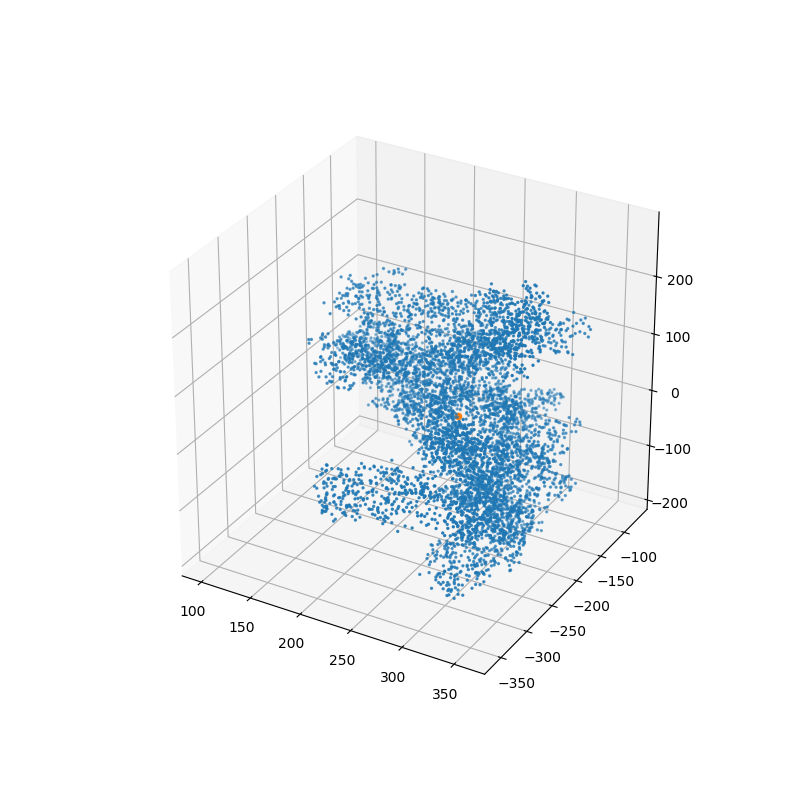

In [11]:
fig = plt.figure( figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z, s=2)
#ax.set_aspect("equal")
ax.scatter(x0, y0, z0)

plt.show()

In [12]:
# Generate the wireframe using angles
u_phi = np.linspace(0, 2 * np.pi, 100)
v_theta = np.linspace(0, np.pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
xw = a * np.outer(np.cos(u_phi), np.sin(v_theta))
yw = b * np.outer(np.sin(u_phi), np.sin(v_theta))
zw = c * np.outer(np.ones_like(u_phi), np.cos(v_theta))

Xt = np.zeros_like(xw)
Yt = np.zeros_like(yw)
Zt = np.zeros_like(zw)

# Rotate the wireframe
for i in range(100):
    for j in range(100):
        Xt[i,j] = a1*xw[i,j] + b1*yw[i,j] + c1*zw[i,j] + x0
        Yt[i,j] = a2*xw[i,j] + b2*yw[i,j] + c2*zw[i,j] + y0
        Zt[i,j] = a3*xw[i,j] + b3*yw[i,j] + c3*zw[i,j] + z0

<IPython.core.display.Javascript object>


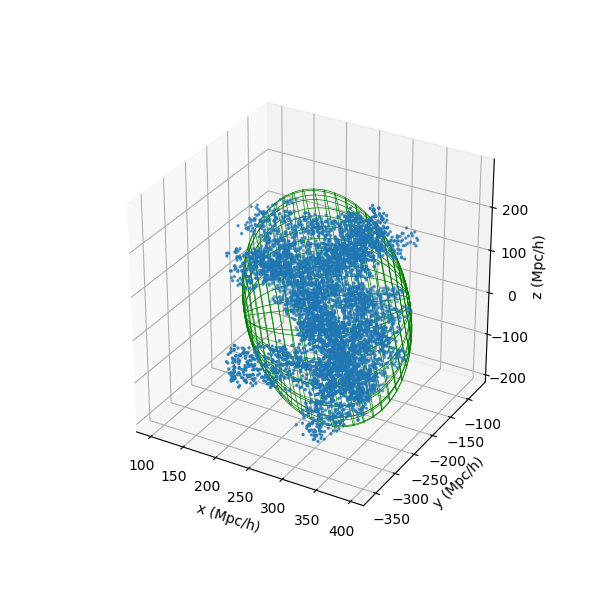

Text(0.5, 0, 'z (Mpc/h)')

In [13]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z, s=2)
ax.plot_wireframe(Xt, Yt, Zt,  rstride=4, cstride=4, color="green", linewidth=0.5 )

ax.set_xlabel("x (Mpc/h)")
ax.set_ylabel("y (Mpc/h)")
ax.set_zlabel("z (Mpc/h)")



In [14]:
nrand = 1.6

In [15]:
V_ellip = a * b * c * (4.0/3.0) * np.pi

In [16]:
!wc -l observed_catalogs/v300.dat

271452 observed_catalogs/v300.dat


In [17]:
V_npart = Npart * (720**3) / (nrand * 271452) 

In [18]:
V_npart / V_ellip

0.3545399861451849

In [19]:
print(a,b,c)

225.249365492264 144.6302363452818 106.5759484758536


In [20]:
def ellipticity(a,b,c):
    return (1/4.)*((a**2 - c**2) / (a**2 + b**2 + c**2))

def prolatness(a,b,c):
    return(1/4.)*( (b**2-c**2)+(b**2 - a**2)) / (a**2 + b**2 + c**2)

In [21]:
ellipticity(a,b,c)

0.11859152259858698

In [22]:
prolatness(a,b,c)

-0.06101378366529412